# Survey Vlaamse Meesters

## Data Import

In [1]:
import pandas as pd
file="data/Onbewerkte-gegevens-24513-51204-201741010819-TH.csv"
df = pd.read_csv(file, encoding = "ISO-8859-1", sep=";")
df[:3]

,Respondent,Taal,Datum geantwoord,Distributiemethode,Einde bereikt,Invultijd (seconden),Browser,Besturingssysteem,IP,Locatie (via IP),...,30.15. James Ensor,30.16. William Turner,30.17. Geen van bovenstaande,31.1. Pieter Paul Rubens,31.2. Jan van Eyck (Lam Gods),31.3. Pieter Bruegel de Oude,32. Zou u een citytrip naar Brussel/Vlaanderen laten beïnvloeden door de huidige terreurdreiging?,33. Wat is uw geslacht,34. Wat is de samenstelling van uw huishouden?,35. Wat is uw hoogst genoten opleiding?
0,22,nl,16/12/2015 10:17,Via panel provider,1,312,Google Chrome,Windows 10,84.31.26.69,NaN,...,NaN,NaN,Geen van bovenstaande,NaN,NaN,NaN,Misschien,Vrouw,"Gehuwd/samenwonend met kind(eren), jongste kin...","Hoger humaniora, beroeps- of technisch onderwijs"
1,23,nl,16/12/2015 10:29,Via panel provider,1,919,Firefox,Windows Vista,77.173.234.228,"Putte, Nederland",...,NaN,NaN,NaN,Antwerpen,Brugge,Brussel,Ja,Man,Gehuwd/samenwonend zonder kind(eren),Universitair/postuniversitair onderwijs (Master)
2,24,nl,16/12/2015 10:44,Via panel provider,1,154,Google Chrome,Windows 7,89.146.11.36,"Westervoort, Nederland",...,NaN,NaN,NaN,NaN,NaN,NaN,Ja,Vrouw,Gehuwd/samenwonend zonder kind(eren),"Hoger humaniora, beroeps- of technisch onderwijs"


## Data Wrangling
### dates to datetime

In [2]:
df["Datum geantwoord"] = pd.to_datetime(df.loc[:,"Datum geantwoord"], infer_datetime_format=True)
df[:3]

,Respondent,Taal,Datum geantwoord,Distributiemethode,Einde bereikt,Invultijd (seconden),Browser,Besturingssysteem,IP,Locatie (via IP),...,30.15. James Ensor,30.16. William Turner,30.17. Geen van bovenstaande,31.1. Pieter Paul Rubens,31.2. Jan van Eyck (Lam Gods),31.3. Pieter Bruegel de Oude,32. Zou u een citytrip naar Brussel/Vlaanderen laten beïnvloeden door de huidige terreurdreiging?,33. Wat is uw geslacht,34. Wat is de samenstelling van uw huishouden?,35. Wat is uw hoogst genoten opleiding?
0,22,nl,2015-12-16 10:17:00,Via panel provider,1,312,Google Chrome,Windows 10,84.31.26.69,NaN,...,NaN,NaN,Geen van bovenstaande,NaN,NaN,NaN,Misschien,Vrouw,"Gehuwd/samenwonend met kind(eren), jongste kin...","Hoger humaniora, beroeps- of technisch onderwijs"
1,23,nl,2015-12-16 10:29:00,Via panel provider,1,919,Firefox,Windows Vista,77.173.234.228,"Putte, Nederland",...,NaN,NaN,NaN,Antwerpen,Brugge,Brussel,Ja,Man,Gehuwd/samenwonend zonder kind(eren),Universitair/postuniversitair onderwijs (Master)
2,24,nl,2015-12-16 10:44:00,Via panel provider,1,154,Google Chrome,Windows 7,89.146.11.36,"Westervoort, Nederland",...,NaN,NaN,NaN,NaN,NaN,NaN,Ja,Vrouw,Gehuwd/samenwonend zonder kind(eren),"Hoger humaniora, beroeps- of technisch onderwijs"


## Basic visualisation of features

In [3]:
import matplotlib.pyplot as plt
plt.matplotlib.style.use('ggplot')

### Taal

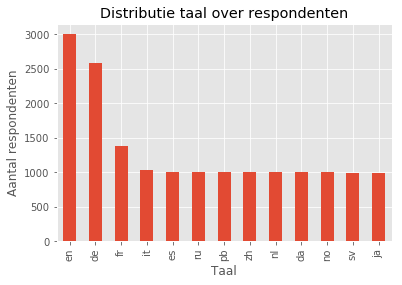

In [4]:
plt_df = df[["Respondent","Taal"]].groupby("Taal").Respondent.nunique()
plt_df = plt_df.sort_values(ascending =False)

# Strings
xlab = 'Taal Respondent'
ylab = 'Aantal respondenten'
title = 'Distributie taal over respondenten'

# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)

# Add title
plt.title(title)

# Create plot
plt_df.plot.bar();
    
# Render plot
plt.show()

## Datum geantwoord

In [5]:
plt_df = df[["Taal", "Datum geantwoord"]].copy()
plt_df['count'] = 1;
plt_df = plt_df.sort_values(by="Datum geantwoord")
plt_df['cumcount'] = plt_df.groupby(by=["Taal"]).cumsum()

plt_df = plt_df.drop(['count'], axis =1)


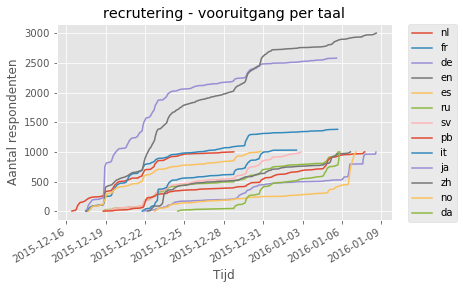

In [7]:
# build plot language per language

for lan in plt_df.Taal.unique():
    x=plt_df.loc[plt_df.Taal == lan, ['Datum geantwoord']]
    y=plt_df.loc[plt_df.Taal == lan, ['cumcount']]
    plt.plot (x, y, label=lan)

# Strings
xlab = 'Tijd'
ylab = 'Aantal respondenten'
title = 'recrutering - vooruitgang per taal'

# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)

# Add title
plt.title(title)

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.gcf().autofmt_xdate()
# Render plot
plt.show()
    

# Einde bereikt

In [12]:
print(df["Einde bereikt"].unique())

[1]


# Invultijd

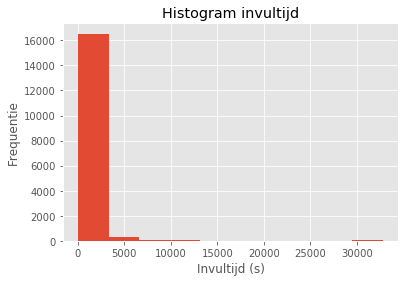

In [31]:
df["Invultijd (seconden)"].plot.hist()

# Strings
xlab = 'Invultijd (s)'
ylab = 'Frequentie'
title = 'Histogram invultijd'

# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)

# Add title
plt.title(title)

# Render plot
plt.show()

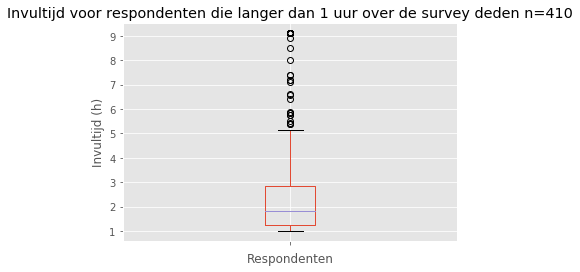

In [50]:
df_plot = (df.loc[df["Invultijd (seconden)"]> 3600, "Invultijd (seconden)"]/3600)
df_plot = df_plot.rename("")
df_plot.plot.box()

# Strings
xlab = 'Respondenten'
ylab = 'Invultijd (h)'
title = "Invultijd voor respondenten die langer dan 1 uur over de survey deden n=" + str(df_plot.size)

# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)

# Add title
plt.title(title)

# Render plot
plt.show()

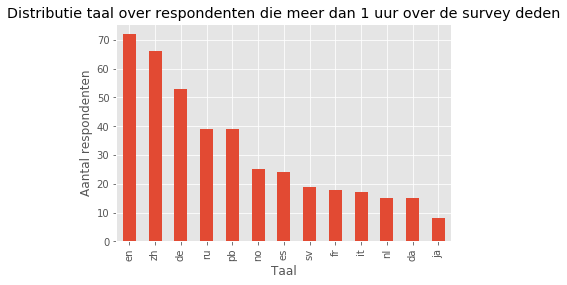

Taal
en    72
zh    66
de    53
ru    39
pb    39
no    25
es    24
sv    19
fr    18
it    17
nl    15
da    15
ja     8
Name: Respondent, dtype: int64

In [90]:
plt_df = df.loc[df["Invultijd (seconden)"]> 3600, ["Respondent","Taal"]].groupby("Taal").Respondent.nunique()
plt_df = plt_df.sort_values(ascending =False)

# Strings
xlab = 'Taal Respondent'
ylab = 'Aantal respondenten'
title = 'Distributie taal over respondenten die meer dan 1 uur over de survey deden'

# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)

# Add title
plt.title(title)

# Create plot
plt_df.plot.bar();
    
# Render plot
plt.show()

In [86]:
df_rel = (df.loc[df["Invultijd (seconden)"] > 3600,["Respondent","Taal"]].groupby("Taal").count() * 100/
 df[["Respondent","Taal"]].groupby("Taal").count())
df_rel = df_rel.sort_values(by="Respondent",ascending =False)
df_rel = df_rel.reset_index()
df_rel

,Taal,Respondent
0,zh,6.600000
1,pb,3.896104
2,ru,3.896104
3,no,2.502503
4,en,2.396804
5,es,2.380952
6,de,2.052672
7,sv,1.905717
8,it,1.650485
9,da,1.500000


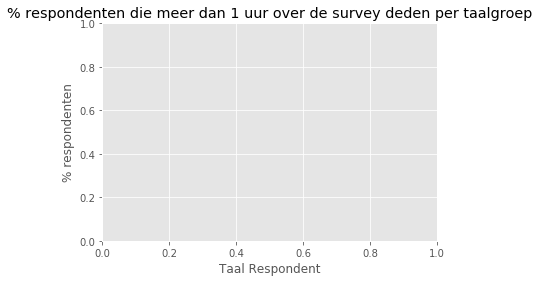

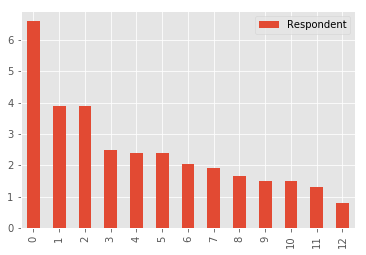

In [95]:
plt.close()

# Strings
xlab = 'Taal Respondent'
ylab = '% respondenten'
title = '% respondenten die meer dan 1 uur over de survey deden per taalgroep'

# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)

# Add title
plt.title(title)

# Create plot
df_rel.plot.bar();
    
# Render plot
plt.show()